In [1]:
"""
Steps:
1. import libraries and data set
2. check data type
3. seperate catagorical and numerical dataframe
4. convert catagorical to numerical
5. drop useless variable
6. heatmap (if possible)
7. deal with missing data
8. run a multiple regression mode
9. interprete equation
10. validate the model
11. result analysis
12. conclusion

"""

'\nSteps:\n1. import libraries and data set\n2. check data type\n3. seperate catagorical and numerical dataframe\n4. convert catagorical to numerical\n5. drop useless variable\n6. heatmap (if possible)\n7. deal with missing data\n8. run a multiple regression mode\n9. interprete equation\n10. validate the model\n11. result analysis\n12. conclusion\n\n'

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split 
import statsmodels.tools.tools as stattools
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

In [62]:
# set Jupyther Notebook to display interactive output for 100 columns and rows at maximum
pd.options.display.max_columns = 100
pd.options.display.max_columns = 100

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 1. Describe the Dataset

In [55]:
# describe the datasets

print(f"Train has {train.shape[0]} rows and  {train.shape[1]} columns")
print(f"Test has {test.shape[0]} rows and  {test.shape[1]} columns")

Train has 1460 rows and  81 columns
Test has 1459 rows and  80 columns


In [56]:
# gives us statistical info about the numerical variables

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
Neighborhood,1460.0,13.251370,6.013735,1.0,8.00,13.0,18.00,25.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0


In [58]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [7]:
'''Traing data set and test data set have identical columns names excpet SalePrice. Because of this, we need to partition the traning data set'''

'Traing data set and test data set have identical columns names excpet SalePrice. Because of this, we need to partition the traning data set'

In [9]:
# obtain information about the features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
# get different types of objects
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# 2. Checking Missing Values

In [66]:
# check missing value

# define a function to check the missing value percentage in each column
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [67]:
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


# 3. Observation (Exploratory Data Analysis )

Text(0.5, 1.0, 'SalePrice Histogram')

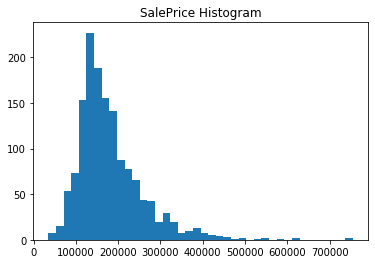

In [90]:
# Visulize target variable 'SalePrice'

plt.hist(train['SalePrice'], bins=40)
plt.title("SalePrice Histogram")

Text(0.5, 1.0, 'SalePrice Boxplot')

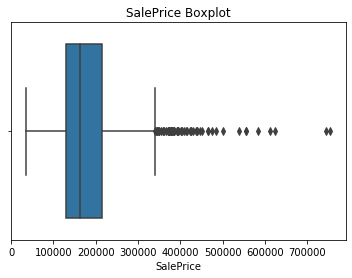

In [91]:
sns.boxplot(train['SalePrice'])
plt.title("SalePrice Boxplot")

In [93]:
# obtain the correlation of all the predictors(columns) with target variable. 
(train.corr())["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Neighborhood     0.210851
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Text(0, 0.5, 'Frequency')

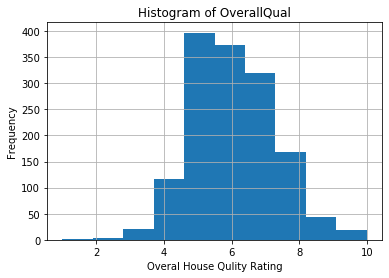

In [94]:
# visualize the variables with high correlation coefficient

train['OverallQual'].hist(bins=10)
plt.title('Histogram of OverallQual')
plt.xlabel('Overal House Qulity Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

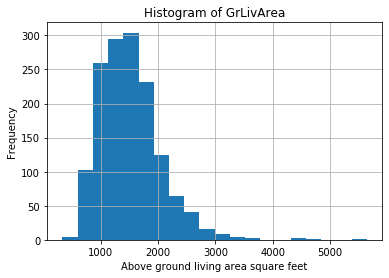

In [98]:
train['GrLivArea'].hist(bins=20)
plt.title('Histogram of GrLivArea')
plt.xlabel('Above ground living area square feet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

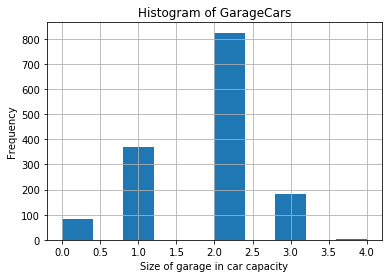

In [104]:
train['GarageCars'].hist()
plt.title('Histogram of GarageCars')
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

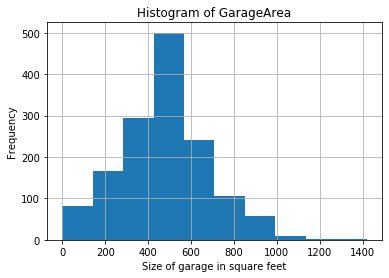

In [107]:
train['GarageArea'].hist()
plt.title('Histogram of GarageArea')
plt.xlabel('Size of garage in square feet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

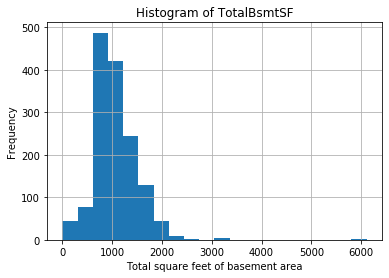

In [110]:
train['TotalBsmtSF'].hist(bins=20)
plt.title('Histogram of TotalBsmtSF')
plt.xlabel('Total square feet of basement area')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

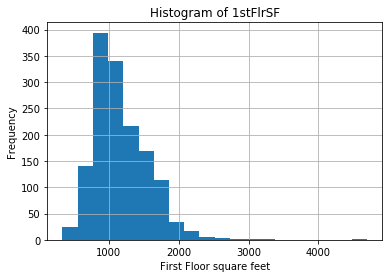

In [119]:
train['1stFlrSF'].hist(bins=20)
plt.title('Histogram of 1stFlrSF')
plt.xlabel('First Floor square feet')
plt.ylabel('Frequency')

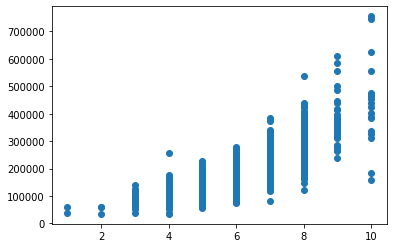

In [113]:
# visualize the relationship between variables and target variable SalePrice

#sns.scatterplot(train['OverallQual'], train['SalePrice'])
plt.scatter(train['OverallQual'], train['SalePrice'])

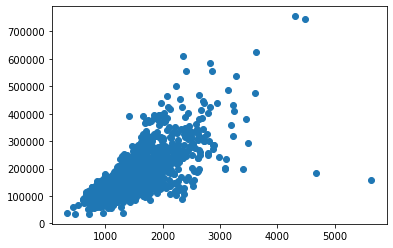

In [114]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

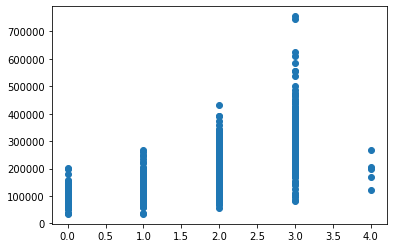

In [115]:
plt.scatter(train['GarageCars'], train['SalePrice'])

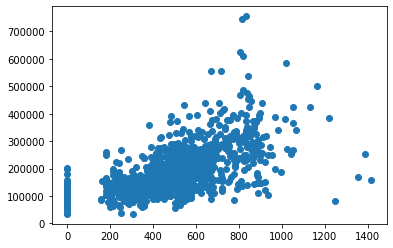

In [116]:
plt.scatter(train['GarageArea'], train['SalePrice'])

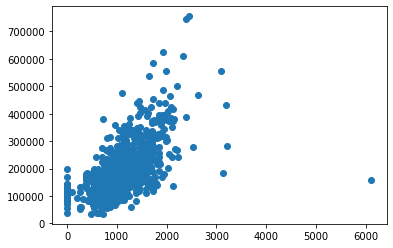

In [117]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

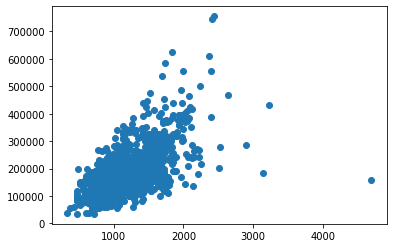

In [120]:
plt.scatter(train['1stFlrSF'], train['SalePrice'])

# 4. Deleteing outliers 

In [121]:
## Deleting two outliers of GrLivArea variable. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

In [10]:
# splitting the data into Quantitative and Qualitative variables

quan_columns = [col for col in train if train.dtypes[col] != 'object']
qual_columns = [col for col in train if train.dtypes[col] == 'object']

quan_columns, qual_columns

(['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'H

In [12]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Text(0.5, 0, 'Neighborhood')

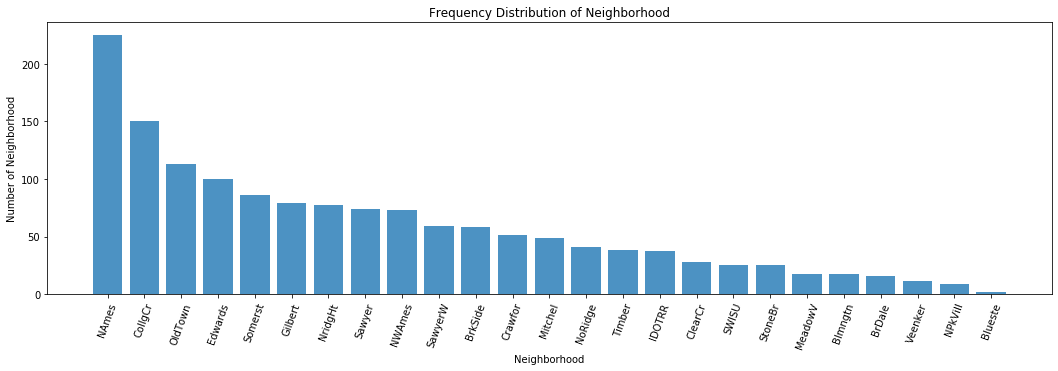

In [13]:
neighborhood_count = train['Neighborhood'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(neighborhood_count.index, neighborhood_count.values, alpha=0.8)
plt.xticks(rotation=70)
plt.title('Frequency Distribution of Neighborhood')
plt.ylabel('Number of Neighborhood')
plt.xlabel('Neighborhood')

Text(0, 0.5, 'Frequency')

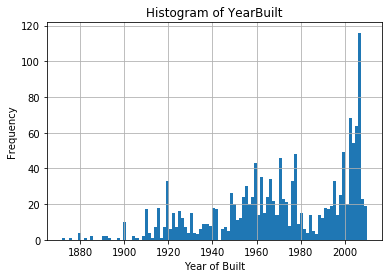

Text(0, 0.5, 'Frequency')

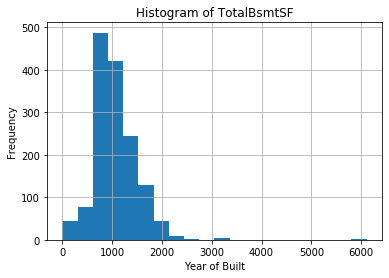

In [16]:
train['TotalBsmtSF'].hist(bins=20)
plt.title('Histogram of TotalBsmtSF')
plt.xlabel('Year of Built')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

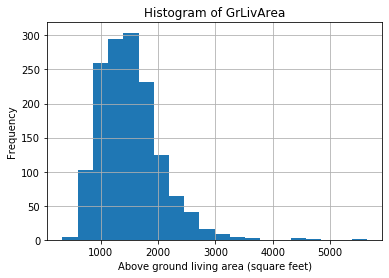

In [17]:
train['GrLivArea'].hist(bins=20)
plt.title('Histogram of GrLivArea')
plt.xlabel('Above ground living area (square feet)')
plt.ylabel('Frequency')

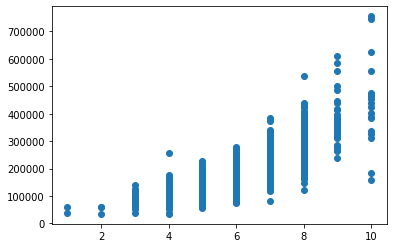

In [18]:
# visualize the relationship between variables OverallQual, YearBuilt, TotalBsmtSF, GrLivArea and target variable SalePrice

#sns.scatterplot(train['OverallQual'], train['SalePrice'])
plt.scatter(train['OverallQual'], train['SalePrice'])

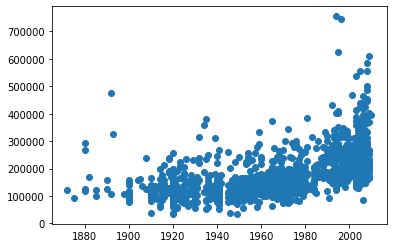

In [19]:
plt.scatter(train['YearBuilt'], train['SalePrice'])

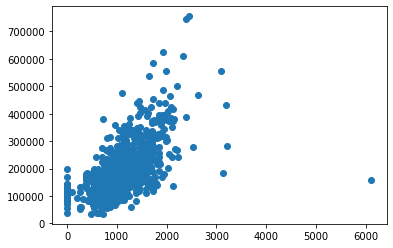

In [20]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

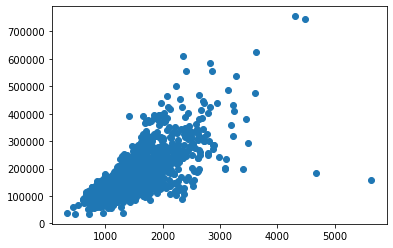

In [21]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

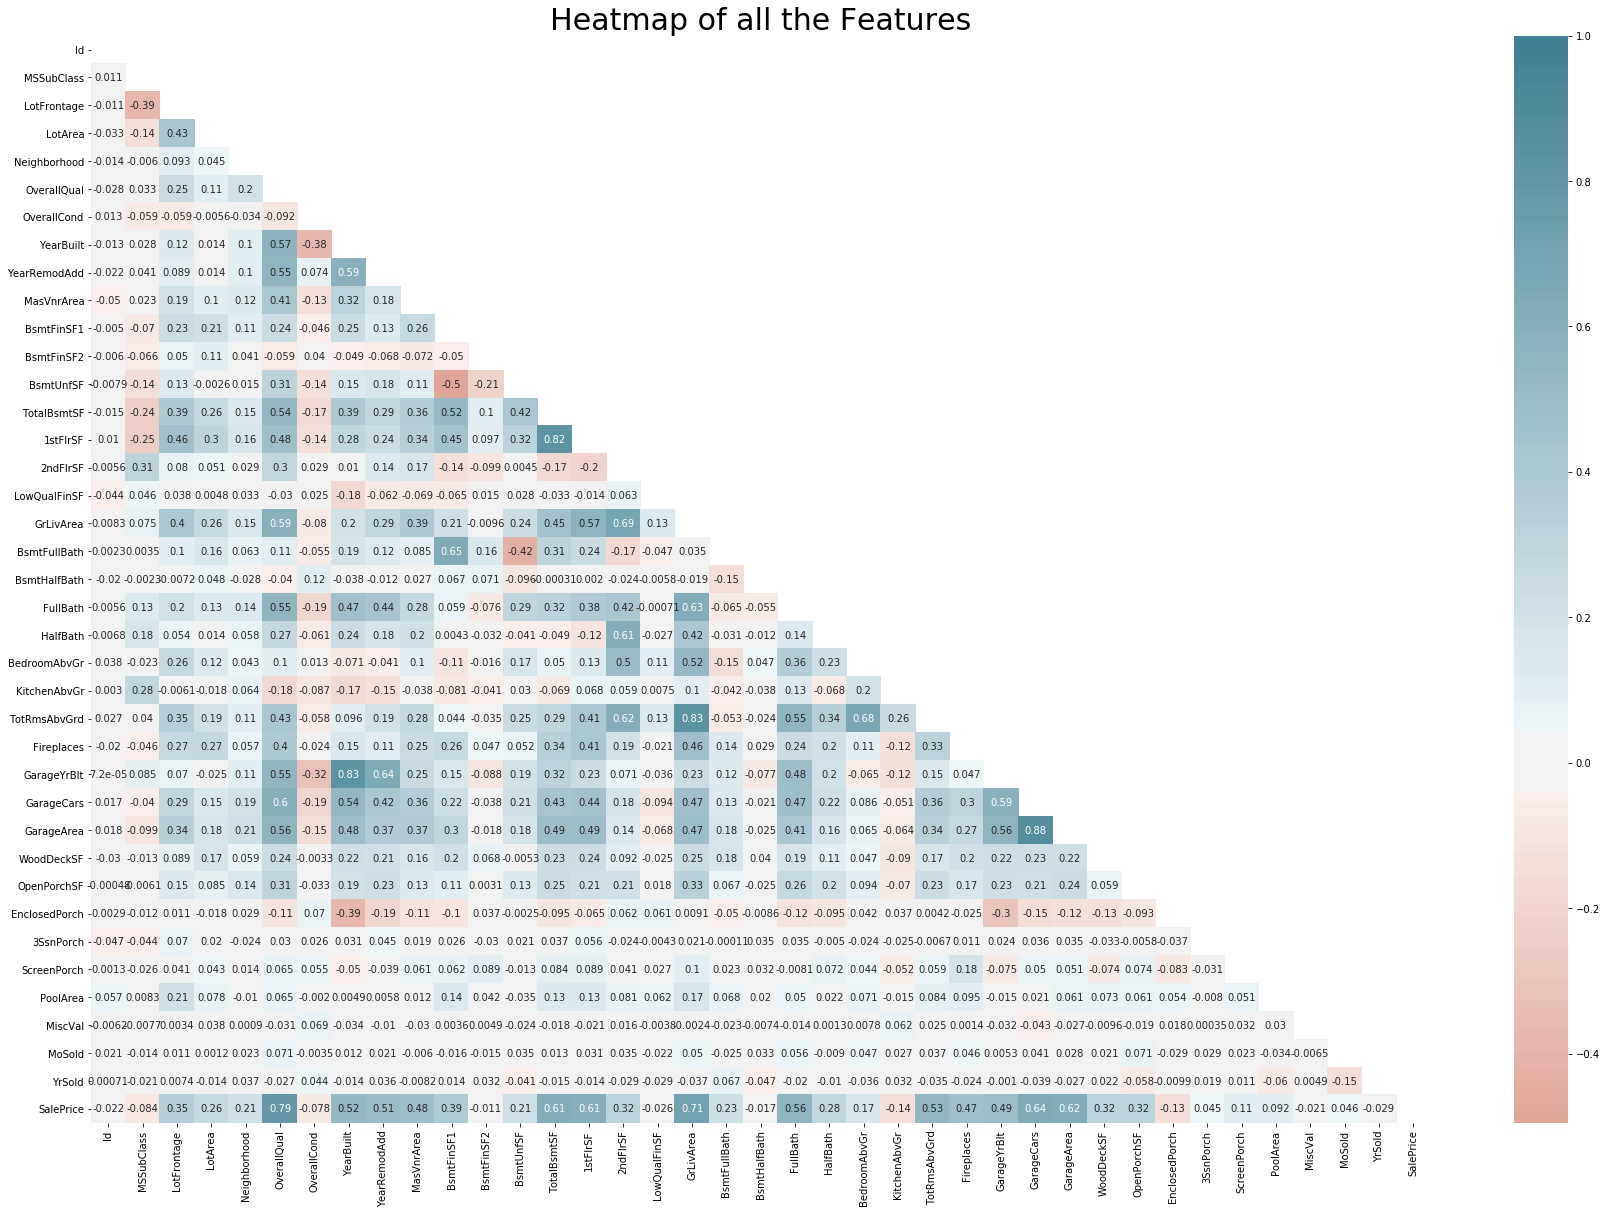

In [50]:
#correlation matrix (heatmap)

plt.subplots(figsize = (30,20))
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
plt.title("Heatmap of all the Features", fontsize = 30);

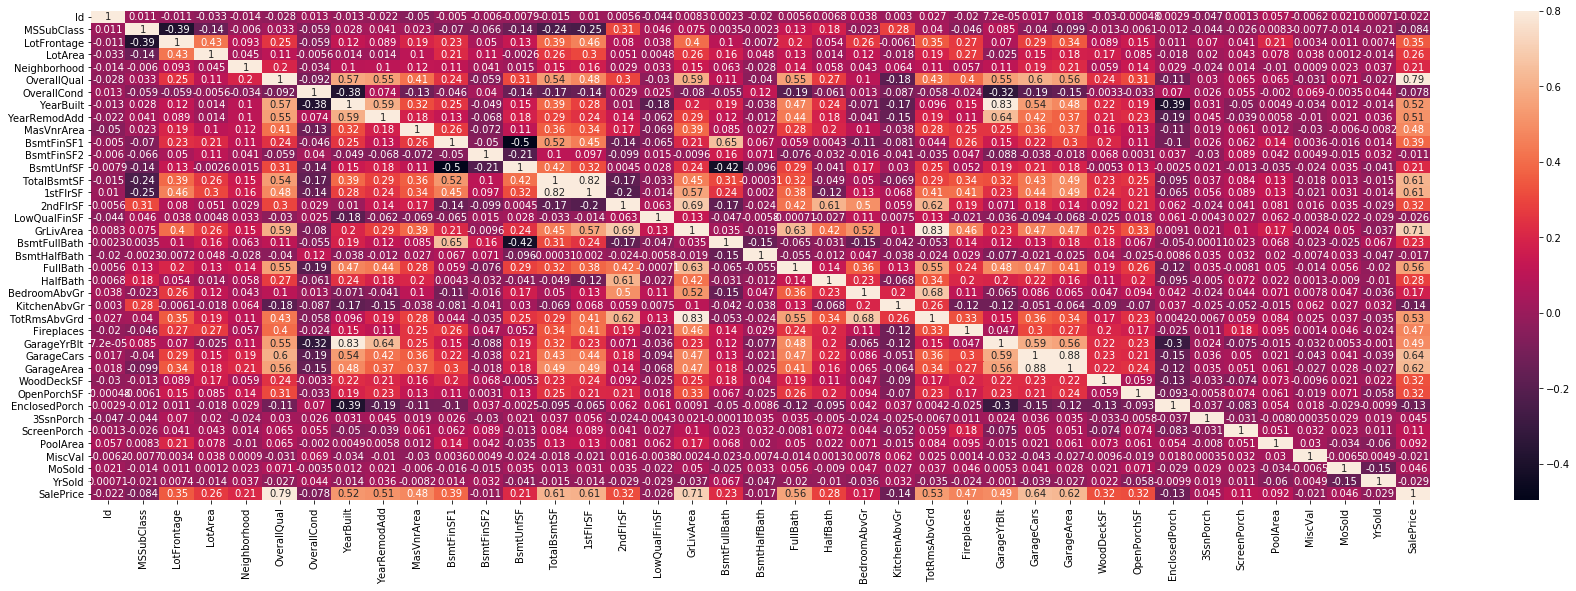

In [48]:
#correlation matrix (heatmap)
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [23]:
# obtain the correlation of all the predictors(columns) with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

# why **2 ?

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
Neighborhood     0.210851
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [24]:
"""Based on the correlation coefficient we obtained, we chose the variables's correlation coefficient >=0.3, which are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd""" 

"Based on the correlation coefficient we obtained, we chose the variables's correlation coefficient >=0.3, which are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd"

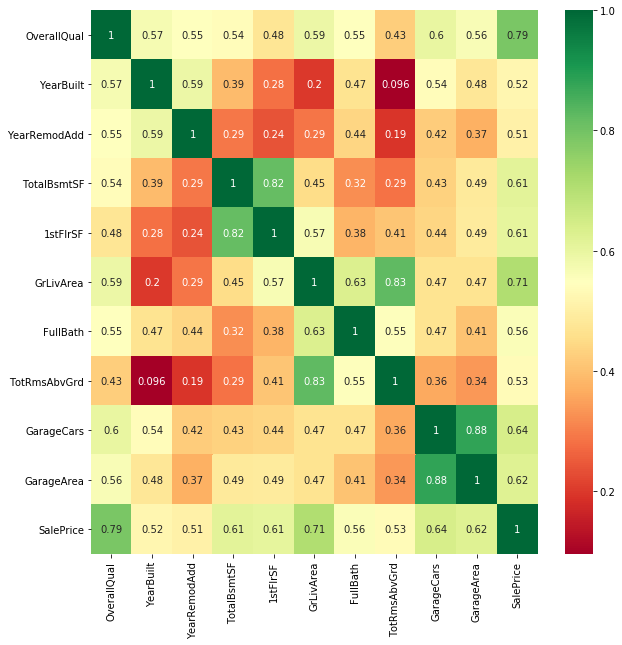

In [25]:
# most correlated features

corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


In [29]:
# drop variables if the missing value is more than 80% 



In [30]:
# Based on our commen sense, Neighborhood is one of the most revevant factors to a house selling price

# convert catagorical variable Neighborhood into numerical 

# convert the unique categorical value into a dictionary
neighborhood_label = train['Neighborhood'].astype('category').cat.categories.tolist()
neighborhood_replace_map_comp = {'Neighborhood': {k: v for k,v in zip(neighborhood_label, list(range(1, len(neighborhood_label)+1)))}}
neighborhood_replace_map_comp

{'Neighborhood': {'Blmngtn': 1,
  'Blueste': 2,
  'BrDale': 3,
  'BrkSide': 4,
  'ClearCr': 5,
  'CollgCr': 6,
  'Crawfor': 7,
  'Edwards': 8,
  'Gilbert': 9,
  'IDOTRR': 10,
  'MeadowV': 11,
  'Mitchel': 12,
  'NAmes': 13,
  'NPkVill': 14,
  'NWAmes': 15,
  'NoRidge': 16,
  'NridgHt': 17,
  'OldTown': 18,
  'SWISU': 19,
  'Sawyer': 20,
  'SawyerW': 21,
  'Somerst': 22,
  'StoneBr': 23,
  'Timber': 24,
  'Veenker': 25}}

In [31]:
# replace the categorical value into numerical
train.replace(neighborhood_replace_map_comp, inplace=True)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,6,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,25,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,6,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,7,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,16,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
# run RandomForestRegressor function

# pull data into target (y) and predictors (X)
train_y = train.SalePrice
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']

# Create training predictors data
train_X = train[predictor_cols]

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
# partition the zillowtr data set 
train_sample, test_sample = train_test_split(train, test_size=0.33, random_state=7)
train.shape, train_sample.shape, test_sample.shape

((1460, 81), (978, 81), (482, 81))

In [34]:
train_sample.SalePrice.describe()

count       978.000000
mean     179315.868098
std       76685.638754
min       34900.000000
25%      130000.000000
50%      161625.000000
75%      212750.000000
max      625000.000000
Name: SalePrice, dtype: float64

In [35]:
test_sample.SalePrice.describe()

count       482.000000
mean     184178.479253
std       84750.405196
min       55000.000000
25%      129125.000000
50%      165750.000000
75%      218782.500000
max      755000.000000
Name: SalePrice, dtype: float64

In [36]:
# Run a multiple regression model to predict SalePrice

# separate the predictor variables and the target variable and save into dataframe format
x = pd.DataFrame(train_sample[['Neighborhood','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'TotRmsAbvGrd']])

x = sm.add_constant(x)

y = pd.DataFrame(train_sample['SalePrice'])
model01 = sm.OLS(y, x).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     316.7
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          2.60e-281
Time:                        09:46:58   Log-Likelihood:                -11716.
No. Observations:                 978   AIC:                         2.345e+04
Df Residuals:                     968   BIC:                         2.350e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.038e+05   7406.610    -14.012      0.000   -1.18e+05   -8.92e+04
Neighborhood   229.1328    218.440      1.049      0.294    -199.539     657.804
OverallQual   2.374e+04   1358.565     17.475      0.000    2.11e+04    2.64e+04
GrLivArea       23.2206      5.173      4.489      0.000      13.069      33.372
GarageCars    1.704e+04   3735.976      4.560      0.000    9703.980    2.44e+04
GarageArea      17.5940     13.283      1.325      0.186      -8.474      43.662
TotalBsmtSF     21.9775      4.898      4.487      0.000      12.365      31.590
FullBath      2660.8499   3162.397      0.841      0.400   -3545.094    8866.794
1stFlrSF         7.7402      5.879      1.317      0.188      -3.796      19.277
TotRmsAbvGrd  4053.5168   1402.295      2.891      0.004    1301.629    6805.405
==============================================================================
Omnibus:                      249.414   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13956.303
Skew:                          -0.114   Prob(JB):                         0.00
Kurtosis:                      21.505   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
'''Since the p value of variables GarageArea, FullBath, 1stFlrSF are larger than 0.05, we will remove these variables from the prediction mode. '''

'Since the p value of variables GarageArea, FullBath, 1stFlrSF are larger than 0.05, we will remove these variables from the prediction mode. '

In [38]:
# run the model again with 3 variables removed
x = pd.DataFrame(train_sample[['Neighborhood','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd']])

x = sm.add_constant(x)

y = pd.DataFrame(train_sample['SalePrice'])
model02 = sm.OLS(y, x).fit()
model02.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     473.8
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          2.39e-284
Time:                        09:46:58   Log-Likelihood:                -11718.
No. Observations:                 978   AIC:                         2.345e+04
Df Residuals:                     971   BIC:                         2.348e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.012e+05   7165.285    -14.131      0.000   -1.15e+05   -8.72e+04
Neighborhood   275.5817    217.054      1.270      0.205    -150.368     701.531
OverallQual   2.368e+04   1307.136     18.117      0.000    2.11e+04    2.62e+04
GrLivArea       26.6070      4.892      5.439      0.000      17.008      36.206
GarageCars    2.161e+04   2155.550     10.025      0.000    1.74e+04    2.58e+04
TotalBsmtSF     27.2496      3.360      8.111      0.000      20.657      33.842
TotRmsAbvGrd  4030.0880   1385.048      2.910      0.004    1312.056    6748.120
==============================================================================
Omnibus:                      245.144   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13206.239
Skew:                          -0.069   Prob(JB):                         0.00
Kurtosis:                      21.002   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# To verify the regression model results, we run the same code on the test data set

# separate the predictor variables and the target variable and save into dataframe format
x = pd.DataFrame(test_sample[['Neighborhood','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'TotRmsAbvGrd']])

x = sm.add_constant(x)

y = pd.DataFrame(test_sample['SalePrice'])
model03 = sm.OLS(y, x).fit()
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     388.1
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          1.52e-179
Time:                        09:46:58   Log-Likelihood:                -5725.1
No. Observations:                 482   AIC:                         1.146e+04
Df Residuals:                     475   BIC:                         1.149e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.485e+04   9795.942     -9.682      0.000   -1.14e+05   -7.56e+04
Neighborhood   321.2785    261.111      1.230      0.219    -191.796     834.353
OverallQual   2.047e+04   1739.476     11.766      0.000     1.7e+04    2.39e+04
GrLivArea       91.5396      6.322     14.479      0.000      79.117     103.962
GarageCars    1.141e+04   2746.004      4.154      0.000    6012.283    1.68e+04
TotalBsmtSF     50.9236      4.981     10.224      0.000      41.137      60.710
TotRmsAbvGrd -1.003e+04   1791.346     -5.599      0.000   -1.35e+04   -6509.517
==============================================================================
Omnibus:                       66.708   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              386.675
Skew:                           0.407   Prob(JB):                     1.08e-84
Kurtosis:                       7.312   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
"""
## fill in missing values
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')
    
    
for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)
    
X = X.drop(overfitted_features, axis=1)


"""

"\n## fill in missing values\nfinal_features = pd.get_dummies(all_data).reset_index(drop=True)\nfinal_features.shape\n\nfor i in missing_val_col:\n    all_data[i] = all_data[i].fillna('None')\n    \n    \nfor i in missing_val_col2:\n    all_data[i] = all_data[i].fillna(0)\n    \nX = X.drop(overfitted_features, axis=1)\n\n\n"